In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../../Data/placement.csv')

In [6]:
df.sample(4)

,cgpa,package
46,6.07,2.26
167,8.13,3.60
115,8.35,4.21
187,6.26,2.44


Text(0, 0.5, 'Package')

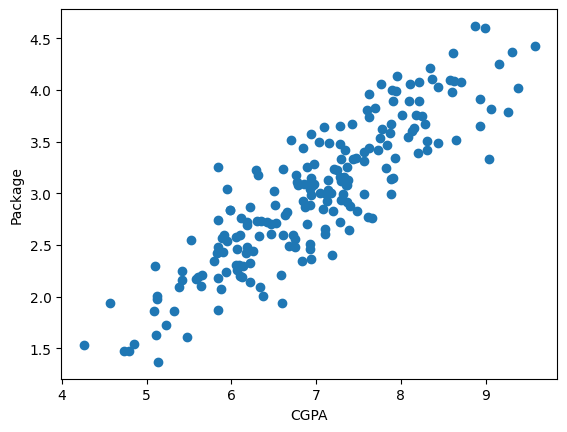

In [8]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package')

In [9]:
X = df.iloc[:, 0:1]
Y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

Text(0, 0.5, 'Package')

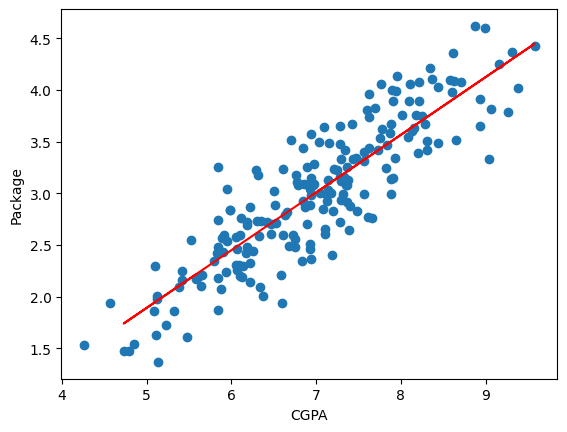

In [19]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
y_pred = lr.predict(X_test)

In [24]:
Y_test.values

array([2.59, 1.94, 3.89, 2.4 , 3.99, 3.62, 2.6 , 4.62, 2.99, 3.09, 3.54,
       3.5 , 4.37, 3.24, 3.26, 2.61, 3.49, 2.09, 3.12, 2.99, 2.43, 1.86,
       2.01, 1.63, 2.46, 4.08, 4.08, 2.79, 2.21, 1.53, 4.  , 3.03, 2.74,
       3.15, 3.76, 3.55, 3.33, 2.87, 2.77, 2.09])

In [25]:
print("Mae", mean_absolute_error(Y_test, y_pred))

Mae 0.2570677875177574


In [26]:
print("Mse", mean_squared_error(Y_test, y_pred))

Mse 0.10910575585573082


In [27]:
print("RMse", np.sqrt(mean_squared_error(Y_test, y_pred)))

Mse 0.10910575585573082


In [30]:
print("R2", r2_score(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

R2 0.8126127333008129


In [31]:
X_test.shape

(40, 1)

In [32]:
# Adjusted R2 
ad_R2 = 1 - ((1 -r2) * (40-1)/ (40-1-1))

In [33]:
ad_R2

0.8076814894403079

### Multi Linear Regression

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

In [2]:
X,y = load_diabetes(return_X_y=True)

In [4]:
X.shape

(442, 10)

In [6]:
y.shape

(442,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [12]:
print(X_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [13]:
reg.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = reg.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [16]:
r2_score(y_test, y_pred)

0.4526027629719197

In [17]:
reg.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [18]:
reg.intercept_

151.34560453985995

### Class of MLR

In [19]:
class MeraLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_trian):
        X_train = np.insert(X_train, 0, 1, axis=1)
        
        betas = np.linalg.inv(np.dot(X_train.T , X_train)).dot(X_train.T).dot(y_trian)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred

In [20]:
lr = MeraLR()

In [21]:
lr.fit(X_train, y_train)

In [22]:
y_pred = lr.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

0.45260276297191904

In [24]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [25]:
lr.intercept_

151.34560453986

### Gradient Descnet

In [28]:
from sklearn.datasets import make_regression    
import numpy as np

In [29]:
X,y = make_regression(n_samples=4 , n_features=1 , n_informative=1, n_targets=1,noise=80, random_state=13)

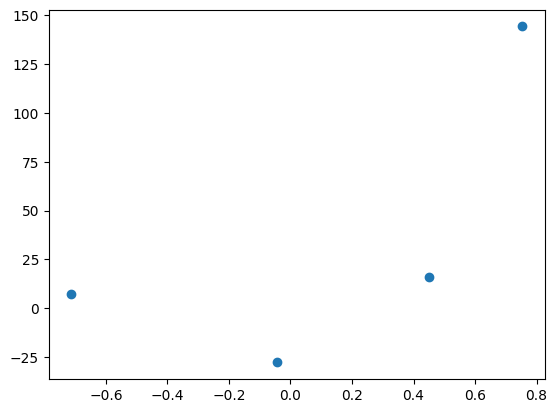

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [31]:
from sklearn.linear_model import LinearRegression


In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X,y)

LinearRegression()

In [38]:
pred = lr.predict(X)

In [35]:
lr.coef_

array([78.35063668])

In [36]:
lr.intercept_

26.15963284313262

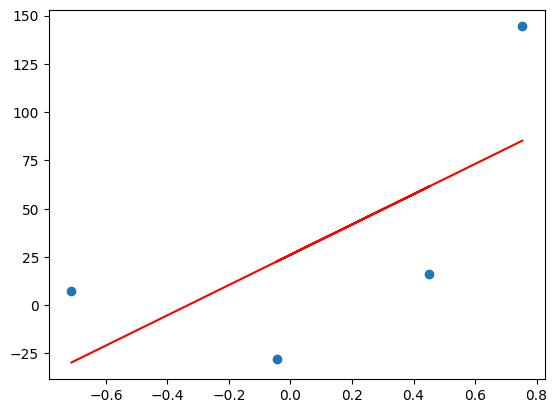

In [39]:
plt.scatter(X,y)
plt.plot(X, pred, color='red')

In [ ]:
# lets apply GD assuming slope is constant m = 78.35
# lets assume the starting value of intercept is b = 0

In [40]:
y_pred = ((78.35 * X) + 0).reshape(4)

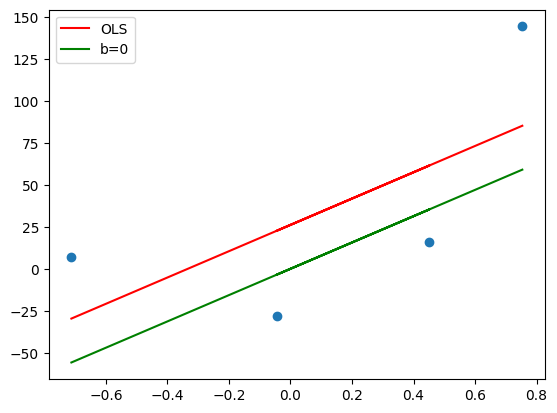

In [41]:
plt.scatter(X,y)
plt.plot(X, lr.predict(X), color='red',label='OLS') 
plt.plot(X, y_pred, color='green',label='b=0')
plt.legend()
plt.show()

In [42]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - (m*X.ravel() + b))
loss_slope

-209.27763408209216

In [46]:
# n*slope
lr = 0.1
step_size = lr * loss_slope
step_size

-20.927763408209216

In [45]:
b = b - step_size
b

41.85552681641843

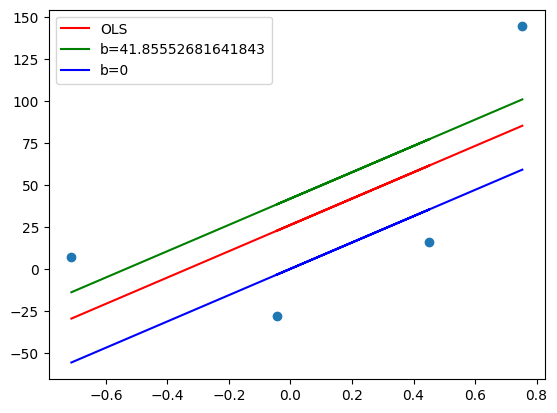

In [48]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X, pred, color='red',label='OLS')
plt.plot(X, y_pred1, color='green',label='b={}' .format(b))
plt.plot(X, y_pred, color='blue',label='b=0')
plt.legend()
plt.show()

In [49]:
# 2nd iteration

loss_slope = -2 * np.sum(y - (m*X.ravel() + b))
step_size = lr * loss_slope
b = b - step_size

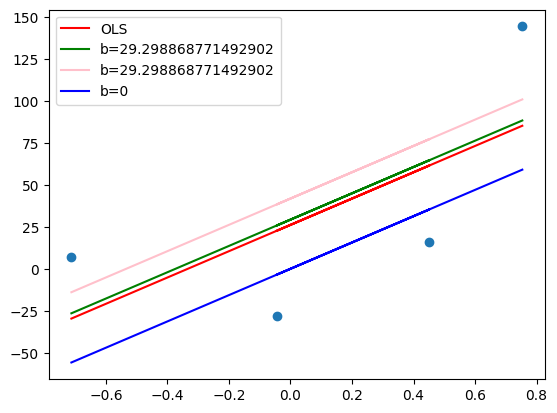

In [50]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X, pred, color='red',label='OLS')
plt.plot(X, y_pred2, color='green',label='b={}' .format(b)) 
plt.plot(X, y_pred1, color='pink',label='b={}' .format(b))
plt.plot(X, y_pred, color='blue',label='b=0')
plt.legend()
plt.show()

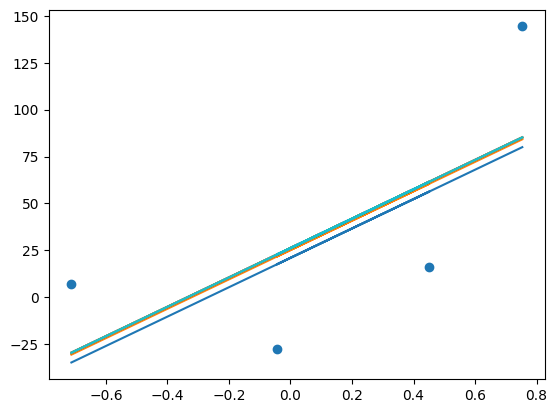

In [52]:
b = 0
m = 78.35
lr = 0.1
epochs = 10

for i in range(epochs):
    loss_slope = -2 * np.sum(y - (m*X.ravel() + b))
    step_size = lr * loss_slope
    b = b - step_size
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

### Gradient Descent own class

In [54]:
class GDRegressor:

    def __init__(self, lr , epochs):
        self.m = 29.19
        self.b = -120
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope = -2 * np.sum(y - (self.m*X.ravel() + self.b))
            self.b = self.b - (self.lr * loss_slope)
        print(self.b)

In [55]:
gd = GDRegressor(lr=0.001, epochs=100)

In [56]:
gd.fit(X,y)

-36.25859506932615


## Batch Gradient Descent 

In [4]:
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
X,y = load_diabetes(return_X_y=True)

In [6]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
print(lr.coef_)
print(lr.intercept_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


In [12]:
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.4526027629719197

### Mera Batch Gradient Descent

In [17]:
class GDRegressor:

    def __init__(self , lr=0.01 , epochs=100):
        self.m = None
        self.b = None
        self.lr = lr
        self.epochs = epochs

    def fit(self , X_train , y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # so we update all the coeff and intercept
            y_hat = np.dot(X_train, self.coef_) + self.intercept_
            intercept_der = -2 * np.sum(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            self.der = -2 * np.dot((y_train - y_hat), X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * self.der)

        print(self.coef_)

    def predict(self):
        return np.dot(X_test, self.coef_) + self.intercept_

In [18]:
gdR = GDRegressor()
gdR.fit(X_train, y_train)

[ 1.10955501e+75  1.41509430e+74  1.33568696e+75  9.07601488e+74
 -4.27508952e+74 -6.20283652e+74 -7.61090613e+74  2.89767678e+74
  9.35820664e+74  1.45523787e+75]


### Stochastic Gradient Descent

Stochastic Gradient descent converge faster toward the solution. Bcz in SGD ye har row ka data ko uthata hn usma changes krta ha jo isa help krta ha usa sahi solution ki trf ponchna ka lia. Na ka BGD ki trh jo full data memory ma load krta ha phr calculation perform krta ha. jis ki wja sa more epochs require hta hn jo hmara prog ko slow kr deta hn.

if no of epochs same in both than BGD is faster

#### Learning Schedules

We vary our learning schedule so our SGD is give me best result. hm basically lr ko decrease krta hn or end pa itna kam ho jta ha taka hama answer correct milta ha.

In sklearn their is a class called SGD regressor.<br>
sklearn.linear_model.SGDRegressor

In [ ]:
# learnign scheule 

t0,t1 = 5,50
def learning_schedule(t):
    return t0/(t+t1)

for i in range(epochs):
    for j in range(X.shape[0]):
        lr = learning_schedule(i*X.shape[0] + j)

In [25]:
class SGDRegressor:

    def __init__(self , lr=0.01 , epochs=100):
        self.m = None
        self.b = None
        self.lr = lr
        self.epochs = epochs

    def fit(self , X_train , y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            # so we update all the coeff and intercept
            for j in range(X_train.shape[0]):

                idx = np.random.randint(0, X_train.shape[0])
                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print(self.coef_)

    def predict(self,X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [26]:
sgdR = SGDRegressor()

In [27]:
sgdR.fit(X_train, y_train)

[  53.79054197 -162.32929638  470.43240636  313.24527207  -52.29579258
  -97.94728158 -211.53219003  149.49020026  349.57490385  133.56364358]


In [29]:
y_pred = sgdR.predict(X_test)
r2_score(y_test, y_pred)

0.4101476343954834

### Polynomial Regression

jab hamra pass data linear sort of nahi hta than hm polynomial apply krta hn. Taka best fit line draw aisa ho ka sab point ka mid sa pass kra uska lia hmaa degree ki value aisa set krni ho gi ka na to underfit ho or na hi overfit.

In [1]:
# polynomial regression for 1 input and 1 output col

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [4]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

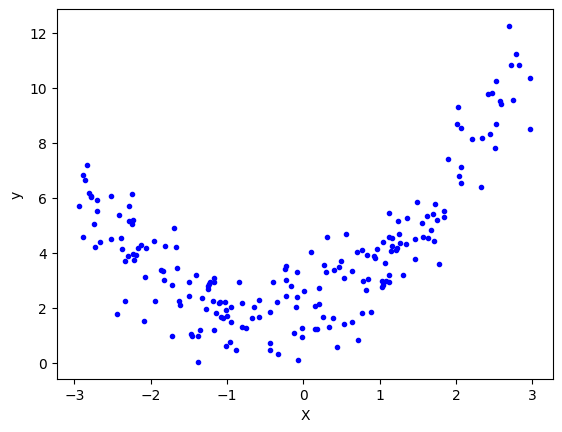

In [5]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)


In [16]:
# r2_score(y_test, y_pred)

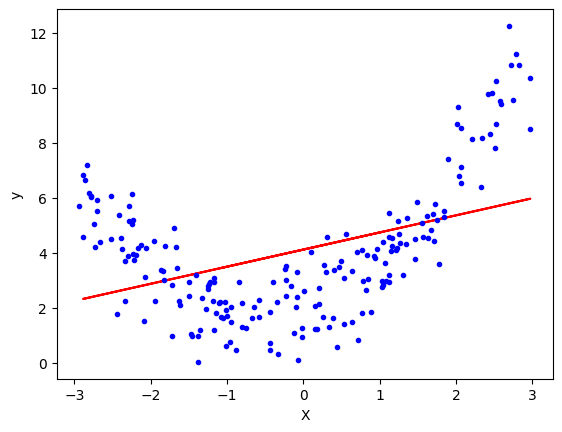

In [17]:
plt.plot(X_train, lr.predict(X_train), color='red')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()    

In [25]:
# Applaying polynomail Linear regression
# degree = 2

poly = PolynomialFeatures(degree=2, include_bias=True)
 
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [26]:
print(X_train[0])
print(X_train_trans[0])
print(X_train.shape)
print(X_train_trans.shape)

[1.02844836]
[1.         1.02844836 1.05770603]
(160, 1)
(160, 3)


In [27]:
lr = LinearRegression()
lr.fit(X_train_trans , y_train)

LinearRegression()

In [29]:
y_pred = lr.predict(X_test_trans)

In [32]:
from sklearn.metrics import r2_score

In [33]:
r2_score(y_test, y_pred)

0.8349544525275123

In [34]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.79649121 0.78189384]]
[1.9787405]
